In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
# we are reading the csv file
data=pd.read_csv('Train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
# finding the shape of the data
data.shape,test_data.shape

((66587, 49), (16647, 48))

In [4]:
data.replace('?',np.nan,inplace=True)
test_data.replace('?',np.nan,inplace=True)

In [5]:
data.head()

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,69375,197029140,51521940,Hispanic,Male,[80-90),NaN,4,Emergency/Trauma,39,...,No,No,No,No,No,No,No,No,Yes,1
1,57272,163571946,92631357,Caucasian,Male,[60-70),NaN,3,Emergency/Trauma,34,...,No,No,No,No,No,No,No,No,No,0
2,82347,256497366,30023982,Caucasian,Female,[50-60),NaN,6,Nephrology,50,...,No,Down,No,No,No,No,No,Ch,Yes,1
3,89608,289891212,93606021,AfricanAmerican,Female,[70-80),NaN,5,NaN,63,...,No,Down,No,No,No,No,No,Ch,Yes,1
4,24091,81873900,23464296,Caucasian,Male,[70-80),NaN,9,Psychiatry,17,...,No,No,No,No,No,No,No,No,No,1


In [6]:
data.tail()

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
66582,39934,124202466,23450508,Caucasian,Female,[70-80),NaN,11,InternalMedicine,40,...,No,Steady,No,No,No,No,No,No,Yes,0
66583,47366,145667070,29324601,Caucasian,Male,[80-90),NaN,4,NaN,39,...,No,No,No,No,No,No,No,No,No,1
66584,76555,231061116,2179062,Caucasian,Female,[60-70),NaN,2,NaN,24,...,No,No,No,No,No,No,No,No,Yes,1
66585,25392,84911682,20531754,NaN,Female,[80-90),NaN,4,InternalMedicine,39,...,No,No,No,No,No,No,No,No,No,0
66586,51312,153167502,81985473,Caucasian,Female,[80-90),NaN,2,NaN,38,...,No,Steady,No,No,No,No,No,Ch,Yes,1


In [7]:
#  columns in dataframe
data.columns

Index(['index', 'encounter_id', 'patient_id', 'race', 'gender', 'age',
       'weight', 'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'diag_4', 'diag_5', 'number_diagnoses', 'X1', 'X2', 'X3', 'X4', 'X5',
       'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16',
       'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')

In [8]:
data.corr()

,index,encounter_id,patient_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_5,number_diagnoses,readmitted
index,1.000000,0.967746,0.530321,-0.069455,-0.024829,-0.018229,0.086206,0.123406,0.093911,0.038776,0.010872,0.280526,-0.020770
encounter_id,0.967746,1.000000,0.515897,-0.065718,-0.026513,-0.011833,0.079311,0.110434,0.083868,0.032505,0.010133,0.266711,-0.037686
patient_id,0.530321,0.515897,1.000000,-0.024560,0.008258,-0.010764,0.027329,0.107852,0.064268,0.010618,0.001094,0.228001,0.068800
time_in_hospital,-0.069455,-0.065718,-0.024560,1.000000,0.317791,0.189862,0.466018,-0.004403,-0.014538,0.074129,-0.001322,0.217898,0.053223
num_lab_procedures,-0.024829,-0.026513,0.008258,0.317791,1.000000,0.068696,0.269419,-0.004809,-0.006951,0.045833,-0.007252,0.152295,0.035691
num_procedures,-0.018229,-0.011833,-0.010764,0.189862,0.068696,1.000000,0.388733,-0.024343,-0.043824,-0.067695,0.011024,0.074671,-0.044342
num_medications,0.086206,0.079311,0.027329,0.466018,0.269419,0.388733,1.000000,0.051360,0.008086,0.065070,0.007218,0.262382,0.049729
number_outpatient,0.123406,0.110434,0.107852,-0.004403,-0.004809,-0.024343,0.051360,1.000000,0.090484,0.108023,-0.001494,0.095103,0.081590
number_emergency,0.093911,0.083868,0.064268,-0.014538,-0.006951,-0.043824,0.008086,0.090484,1.000000,0.284529,-0.000602,0.057698,0.107820
number_inpatient,0.038776,0.032505,0.010618,0.074129,0.045833,-0.067695,0.065070,0.108023,0.284529,1.000000,0.004172,0.109730,0.217446


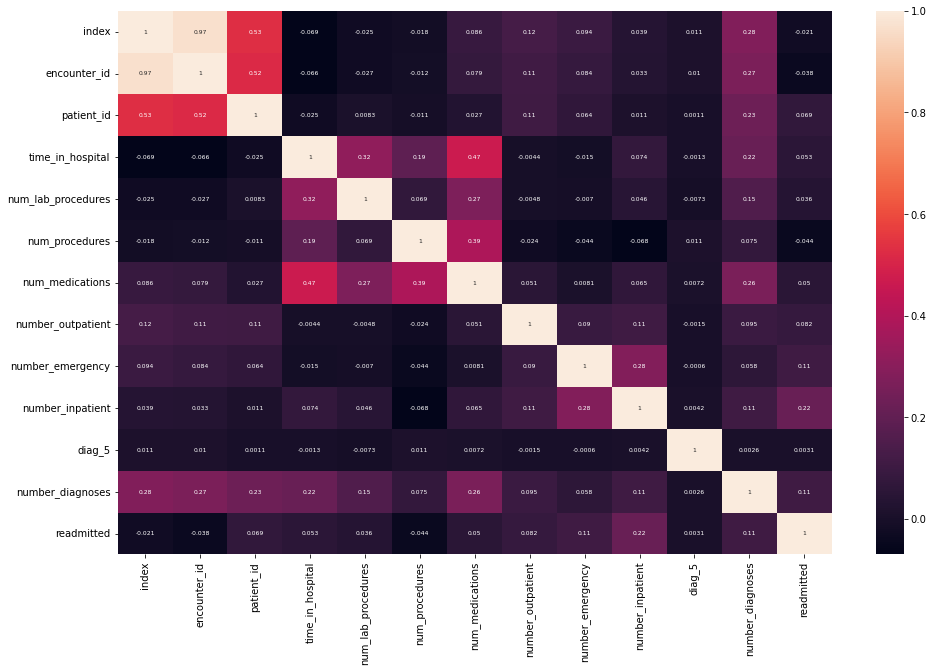

In [9]:
plt.figure(figsize =(16,10))
sns.heatmap(data.corr(), annot = True, annot_kws ={'size':6} )
plt.show()

In [10]:
test_data.columns

Index(['index', 'encounter_id', 'patient_id', 'race', 'gender', 'age',
       'weight', 'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'diag_4', 'diag_5', 'number_diagnoses', 'X1', 'X2', 'X3', 'X4', 'X5',
       'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16',
       'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'change',
       'diabetesMed'],
      dtype='object')

In [11]:
test_data.corr()

,index,encounter_id,patient_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_5,number_diagnoses
index,1.000000,0.967489,0.535217,-0.055473,-0.027086,-0.033707,0.089348,0.111527,0.103822,0.054839,0.005652,0.286863
encounter_id,0.967489,1.000000,0.519790,-0.053338,-0.030764,-0.027238,0.082206,0.097744,0.093610,0.046576,0.004329,0.271240
patient_id,0.535217,0.519790,1.000000,-0.016617,0.015584,-0.010424,0.031617,0.101067,0.080213,0.029273,0.004530,0.236691
time_in_hospital,-0.055473,-0.053338,-0.016617,1.000000,0.316287,0.172692,0.468098,0.000830,-0.000456,0.076844,-0.014081,0.216869
num_lab_procedures,-0.027086,-0.030764,0.015584,0.316287,1.000000,0.050340,0.261719,-0.006792,-0.000059,0.032014,-0.001864,0.153761
num_procedures,-0.033707,-0.027238,-0.010424,0.172692,0.050340,1.000000,0.373698,-0.015059,-0.052321,-0.075417,-0.003872,0.063219
num_medications,0.089348,0.082206,0.031617,0.468098,0.261719,0.373698,1.000000,0.054799,0.023694,0.065876,-0.014327,0.258296
number_outpatient,0.111527,0.097744,0.101067,0.000830,-0.006792,-0.015059,0.054799,1.000000,0.101912,0.111757,-0.006036,0.090176
number_emergency,0.103822,0.093610,0.080213,-0.000456,-0.000059,-0.052321,0.023694,0.101912,1.000000,0.298741,0.001841,0.064558
number_inpatient,0.054839,0.046576,0.029273,0.076844,0.032014,-0.075417,0.065876,0.111757,0.298741,1.000000,-0.000396,0.109242


In [12]:
# object indicates it can be a categorical varialbe / Text or it can be something
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66587 entries, 0 to 66586
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               66587 non-null  int64  
 1   encounter_id        66587 non-null  int64  
 2   patient_id          66587 non-null  int64  
 3   race                65083 non-null  object 
 4   gender              66587 non-null  object 
 5   age                 66587 non-null  object 
 6   weight              2133 non-null   object 
 7   time_in_hospital    66587 non-null  int64  
 8   medical_specialty   33915 non-null  object 
 9   num_lab_procedures  66587 non-null  int64  
 10  num_procedures      66587 non-null  int64  
 11  num_medications     66587 non-null  int64  
 12  number_outpatient   66587 non-null  int64  
 13  number_emergency    66587 non-null  int64  
 14  number_inpatient    66587 non-null  int64  
 15  diag_1              66572 non-null  object 
 16  diag

In [13]:
data.describe(include='all')

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
count,66587.000000,6.658700e+04,6.658700e+04,65083,66587,66587,2133,66587.000000,33915,66587.000000,...,66587,66587,66587,66587,66587,66587,66587,66587,66587,66587.000000
unique,NaN,NaN,NaN,5,3,10,9,NaN,64,NaN,...,1,4,4,2,2,2,1,2,2,NaN
top,NaN,NaN,NaN,Caucasian,Female,[70-80),[75-100),NaN,InternalMedicine,NaN,...,No,No,No,No,No,No,No,No,Yes,NaN
freq,NaN,NaN,NaN,49906,35973,17031,900,NaN,9460,NaN,...,66587,31175,66110,66575,66586,66582,66587,35894,51205,NaN
mean,50903.474282,1.653153e+08,5.422970e+07,NaN,NaN,NaN,NaN,4.397510,NaN,43.115533,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.462012
std,29480.255515,1.030035e+08,3.878819e+07,NaN,NaN,NaN,NaN,2.980995,NaN,19.630417,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498559
min,0.000000,1.573800e+04,1.350000e+02,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,25166.500000,8.440328e+07,2.338646e+07,NaN,NaN,NaN,NaN,2.000000,NaN,31.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,51129.000000,1.528504e+08,4.526103e+07,NaN,NaN,NaN,NaN,4.000000,NaN,44.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,76380.000000,2.305049e+08,8.727185e+07,NaN,NaN,NaN,NaN,6.000000,NaN,57.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [14]:
data.isnull().sum()

index                     0
encounter_id              0
patient_id                0
race                   1504
gender                    0
age                       0
weight                64454
time_in_hospital          0
medical_specialty     32672
num_lab_procedures        0
num_procedures            0
num_medications           0
number_outpatient         0
number_emergency          0
number_inpatient          0
diag_1                   15
diag_2                  231
diag_3                  954
diag_4                  954
diag_5                    0
number_diagnoses          0
X1                        0
X2                        0
X3                        0
X4                        0
X5                        0
X6                        0
X7                        0
X8                        0
X9                        0
X10                       0
X11                       0
X12                       0
X13                       0
X14                       0
X15                 

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distrinution of Readmission')

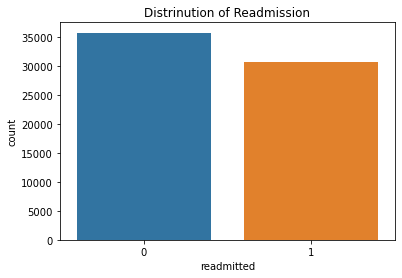

In [15]:
sns.countplot(data['readmitted']).set_title('Distrinution of Readmission')

Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

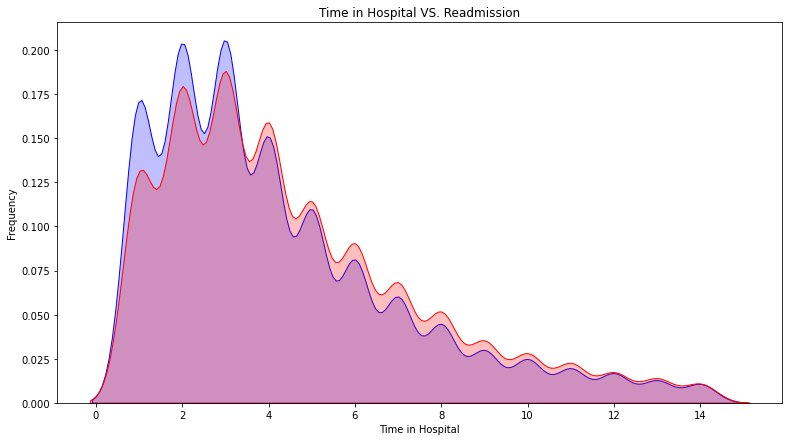

In [16]:
# Time in Hospital and Readmission
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(data.loc[(data['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sns.kdeplot(data.loc[(data['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

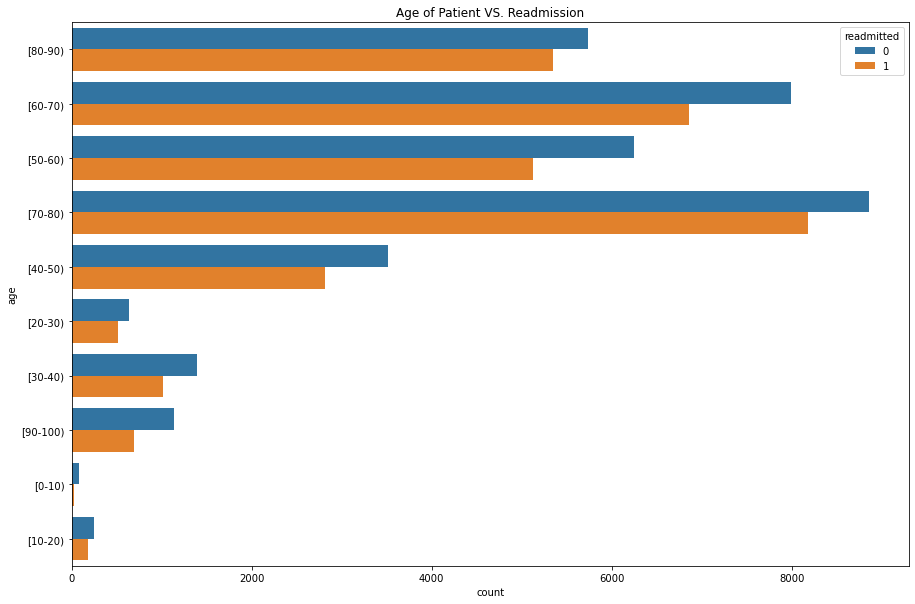

In [17]:
# Age and Readmitted
fig = plt.figure(figsize=(15,10))
sns.countplot(y= data['age'], hue = data['readmitted']).set_title('Age of Patient VS. Readmission')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gender of Patient VS. Readmission')

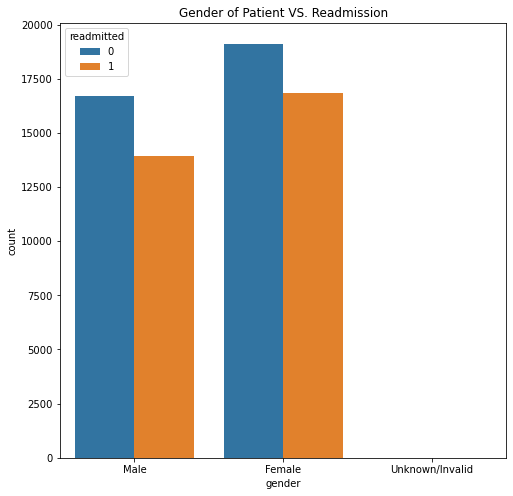

In [18]:
# Gender and Readmission (0-Female,1-Male)

fig = plt.figure(figsize=(8,8))
sns.countplot(data['gender'], hue = data['readmitted']).set_title("Gender of Patient VS. Readmission")

Text(0.5, 1.0, 'Number of lab procedure VS. Readmission')

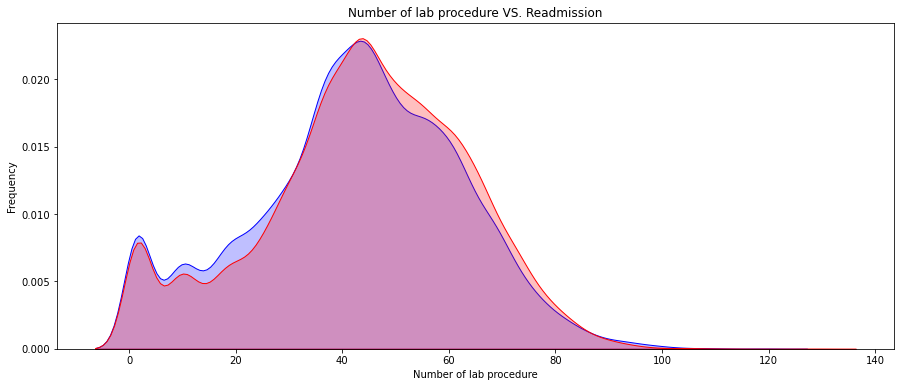

In [19]:
# Number of lab procedure and Readmissio

fig = plt.figure(figsize=(15,6),)
ax=sns.kdeplot(data.loc[(data['readmitted'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
ax=sns.kdeplot(data.loc[(data['readmitted'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')
ax.set(xlabel='Number of lab procedure', ylabel='Frequency')
plt.title('Number of lab procedure VS. Readmission')

In [20]:
# Dropping Columns : X8,X18,X19,X25 (It has single values in the Data frame
data.drop(['index','weight','medical_specialty','X8','X18','X19','X25','diag_1','diag_2','diag_3','diag_4','diag_5'],axis=1,inplace=True)
test_data.drop(['index','weight','medical_specialty','X8','X18','X19','X25','diag_1','diag_2','diag_3','diag_4','diag_5'],axis=1,inplace=True)

In [21]:
data.shape,test_data.shape

((66587, 37), (16647, 36))

In [22]:
#target variable as int so convert it to category
data['readmitted'] = data.readmitted.astype('category')

In [23]:
#There is no imbalance in the class Distribution
data.readmitted.value_counts()

0    35823
1    30764
Name: readmitted, dtype: int64

In [24]:
data.shape

(66587, 37)

In [25]:
en_column = ['race','gender','age','X1','X2','X3','X4','X5','X6','X7','X9','X10','X11','X12','X13','X14','X15','X16','X17',
             'X20','X21','X22','X23','X24','change','diabetesMed']
for i in en_column:
    data[i] = LabelEncoder().fit_transform(data[i])
    test_data[i] = LabelEncoder().fit_transform(test_data[i])

In [26]:
data.shape,test_data.shape

((66587, 37), (16647, 36))

In [27]:
# Numerical Columns has string in it (Dont no Wether to remove or not)

In [28]:
#set(data['diag_4'])

In [29]:
# a = ['V07','V43','V45','V53','V54','V55','V56','V57','V58','E909','V63','V66','V70','V71']
# b = ['E812', 'E814', 'E816', 'E817', 'E821', 'E829', 'E849', 'E850', 'E853', 'E858', 'E870', 'E878', 'E879', 'E880', 'E881', 'E882',
#  'E884', 'E885', 'E887', 'E888', 'E890', 'E900', 'E905', 'E915', 'E917', 'E918', 'E924', 'E927', 'E928', 'E929', 'E930', 'E931',
#  'E932', 'E933', 'E934', 'E935', 'E936', 'E937', 'E939', 'E941', 'E942', 'E944', 'E945', 'E947', 'E950', 'E965', 'E980', 'V02',
#  'V08', 'V09', 'V10', 'V11', 'V12', 'V15', 'V16', 'V17', 'V18', 'V23', 'V25', 'V42', 'V43', 'V44', 'V45', 'V46', 'V49', 'V50',
#  'V53', 'V54', 'V55', 'V57', 'V58', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V69', 'V70', 'V72', 'V85', 'V86']
# c = ['E812', 'E813', 'E815', 'E816', 'E818', 'E819', 'E825', 'E828', 'E849', 'E850', 'E852', 'E855', 'E858', 'E861', 'E864',
#  'E865', 'E870', 'E878', 'E879', 'E880', 'E881', 'E882', 'E883', 'E884', 'E885', 'E886', 'E887', 'E888', 'E892', 'E894', 'E901',
#  'E904', 'E905', 'E906', 'E912', 'E915', 'E916', 'E917', 'E920', 'E927', 'E928', 'E929', 'E930', 'E931', 'E932', 'E933', 'E934',
#  'E935', 'E936', 'E937', 'E938', 'E939', 'E941', 'E942', 'E943', 'E944', 'E946', 'E947', 'E949', 'E950', 'E956', 'V02', 'V03',
#  'V06', 'V07', 'V08', 'V09', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V22', 'V23', 'V25', 'V27', 'V42',
#  'V43', 'V44', 'V45', 'V46', 'V49', 'V53', 'V54', 'V55', 'V57', 'V58', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V72',
#  'V85']
# # Similarly for diag 4 and 5
# data = data[~data['diag_1'].isin(a)]

In [30]:
X = data.drop(['readmitted'],axis=1)
y = data['readmitted']

In [31]:
X.shape

(66587, 36)

In [32]:
y.shape

(66587,)

In [33]:
y

0        1
1        0
2        1
3        1
4        1
        ..
66582    0
66583    1
66584    1
66585    0
66586    1
Name: readmitted, Length: 66587, dtype: category
Categories (2, int64): [0, 1]

In [34]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [35]:
# Without Making changes in the data running every classification model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier

In [36]:
lr = LogisticRegression()

In [37]:
lr.fit(X_train,y_train)

LogisticRegression()

In [38]:
lr_pred = lr.predict(X_test)

In [39]:
lr_pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [40]:
pd.crosstab(pd.Series(y_test,name='Actual'),pd.Series(lr_pred,name='Predict'),margins=True)

Predict,0,1,All
Actual,,,
0,1046,373,1419
1,862,323,1185
All,1908,696,2604


In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, lr_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, lr_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, lr_pred)))
print("F1 Score is {0:.2f}".format(f1_score(y_test,lr_pred)))

Accuracy is 0.57
Precision is 0.56
Recall is 0.32
F1 Score is 0.41


In [42]:
prediction = lr.predict(test_data)

In [43]:
prediction

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [44]:
submission_file = pd.read_csv('Sample_submission.csv')

In [45]:
submission_file

,encounter_id,prediction
0,46325466,1
1,245219616,1
2,155321232,1
3,179491944,1
4,7425954,1
...,...,...
16642,198316824,1
16643,96993108,1
16644,137896878,1
16645,93395658,1


In [46]:
submission_file['prediction'] = prediction

In [47]:
submission_file

,encounter_id,prediction
0,46325466,0
1,245219616,0
2,155321232,0
3,179491944,1
4,7425954,0
...,...,...
16642,198316824,0
16643,96993108,0
16644,137896878,1
16645,93395658,0


In [53]:
submission_file.to_csv("Logistic_Regression_Submission1.csv")

In [49]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
pd.crosstab(pd.Series(y_test,name='Actual'),pd.Series(dt_pred,name='Predict'),margins=True)
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, dt_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, dt_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, dt_pred)))
print("F1 Score is {0:.2f}".format(f1_score(y_test,dt_pred)))

Accuracy is 0.74
Precision is 0.72
Recall is 0.73
F1 Score is 0.72


In [50]:
dt_prediction = dt.predict(test_data)
submission_file['prediction'] = dt_prediction
submission_file.to_csv("Decision_Tree_Submission.csv")

In [51]:
rf = RandomForestClassifier(n_estimators=100,max_depth=5)
rf.fit(X_train,y_train)
rf_pred = dt.predict(X_test)
pd.crosstab(pd.Series(y_test,name='Actual'),pd.Series(rf_pred,name='Predict'),margins=True)
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, rf_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, rf_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, rf_pred)))
print("F1 Score is {0:.2f}".format(f1_score(y_test,rf_pred)))

Accuracy is 0.74
Precision is 0.72
Recall is 0.73
F1 Score is 0.72


In [52]:
dt_prediction = dt.predict(test_data)
submission_file['prediction'] = dt_prediction
submission_file.to_csv("Random_Forest_Submission.csv")